In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## jupyter notebook 한글 설치

import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]
print(mpl.matplotlib_fname())

C:\Users\mingy\anaconda3\envs\nlp\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## 병명 인덱스(컬럼명) 저장하기

In [3]:
colum = ['시구분','구구분','에볼라바이러스병 ','마버그열','라싸열','크리미안콩고출혈열','남아메리카출혈열','리프트밸리열','두창','페스트','탄저','보툴리눔독소증','야토병','신종감염병증후군',
        '중증급성호흡기증후군(SARS)','중동호흡기증후군(MERS)','동물인플루엔자 인체감염증','신종인플루엔자','디프테리아','수두','홍역','콜레라','장티푸스', '파라티푸스',
        '세균성이질','장출혈성대장균감염증','A형간염','백일해','유행성이하선염','풍진(2018년이전)','풍진(선천성)','풍진(후천성)','폴리오','수막구균 감염증','b형헤모필루스인플루엔자',
        '폐렴구균 감염증','한센병','성홍열','반코마이신내성황색포도알균(VRSA) 감염증','카바페넴내성장내세균속균종(CRE) 감염증','E형간염','파상풍','B형간염','일본뇌염',
        'C형간염','말라리아','레지오넬라증','비브리오패혈증','발진티푸스','발진열','쯔쯔가무시증','렙토스피라증','브루셀라증','공수병','신증후군출혈열','크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)',
        '황열','뎅기열','큐열','웨스트나일열','라임병','진드기매개뇌염','유비저','치쿤구니야열','중증열성혈소판감소증후군(SFTS)','지카바이러스감염증','날짜']

len(colum)

67

In [4]:
colum.index('수두')

19

## 날짜 지정

In [95]:
# 원하는 날짜를 지정해주면 될 듯, 일단 2010년만

months = ['01','02','03','04','05','06','07','08','09','10','11','12']
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

# for year in years:
#     for month in months:
#         list_year.append(year + month)


naljja = [year+month for year in years for month in months]
naljja 

['201001',
 '201002',
 '201003',
 '201004',
 '201005',
 '201006',
 '201007',
 '201008',
 '201009',
 '201010',
 '201011',
 '201012',
 '201101',
 '201102',
 '201103',
 '201104',
 '201105',
 '201106',
 '201107',
 '201108',
 '201109',
 '201110',
 '201111',
 '201112',
 '201201',
 '201202',
 '201203',
 '201204',
 '201205',
 '201206',
 '201207',
 '201208',
 '201209',
 '201210',
 '201211',
 '201212',
 '201301',
 '201302',
 '201303',
 '201304',
 '201305',
 '201306',
 '201307',
 '201308',
 '201309',
 '201310',
 '201311',
 '201312',
 '201401',
 '201402',
 '201403',
 '201404',
 '201405',
 '201406',
 '201407',
 '201408',
 '201409',
 '201410',
 '201411',
 '201412',
 '201501',
 '201502',
 '201503',
 '201504',
 '201505',
 '201506',
 '201507',
 '201508',
 '201509',
 '201510',
 '201511',
 '201512',
 '201601',
 '201602',
 '201603',
 '201604',
 '201605',
 '201606',
 '201607',
 '201608',
 '201609',
 '201610',
 '201611',
 '201612',
 '201701',
 '201702',
 '201703',
 '201704',
 '201705',
 '201706',
 '201707',

In [88]:
df_201001  =pd.read_csv('C:/Users/mingy/Downloads/기본통계_지역별_201001.csv', encoding = 'CP949', header= None)
# 컬럼명 병명으로 지정
df_201001.columns = colum
df_201001['날짜'] = df_201001['날짜'].apply(lambda x : 201001) 

In [92]:
df_201001['뎅기열']


0      9
1      3
2      1
3      0
4      0
      ..
285    0
286    0
287    0
288    0
289    0
Name: 뎅기열, Length: 290, dtype: int64

In [82]:
df_201001

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,전국,전국,0,0,0,0,0,0,0,0,...,9,5,0,0,0,0,0,0,0,NaN
1,서울,서울,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,NaN
2,서울,강남구,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
3,서울,강동구,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
4,서울,강북구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,제주,제주시,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
286,제주,남제주군,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
287,제주,북제주군,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
288,세종,세종,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [93]:
df_201002  =pd.read_csv('C:/Users/mingy/Downloads/기본통계_지역별_201002.csv', encoding = 'CP949', header= None)
# 컬럼명 병명으로 지정
df_201002.columns = colum
df_201002['날짜'] = df_201002['날짜'].apply(lambda x : 201002) 

In [94]:
df_201002

,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,...,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증,날짜
0,전국,전국,0,0,0,0,0,0,0,0,...,6,3,0,0,0,0,0,0,0,201002
1,서울,서울,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,201002
2,서울,강남구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002
3,서울,강동구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002
4,서울,강북구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,제주,제주시,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,201002
286,제주,남제주군,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002
287,제주,북제주군,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002
288,세종,세종,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002


In [96]:
naljja = naljja + ['202001', '202002', '202003', '202004', '202005', '202006', '202007']

In [97]:
naljja[1:]

['201002',
 '201003',
 '201004',
 '201005',
 '201006',
 '201007',
 '201008',
 '201009',
 '201010',
 '201011',
 '201012',
 '201101',
 '201102',
 '201103',
 '201104',
 '201105',
 '201106',
 '201107',
 '201108',
 '201109',
 '201110',
 '201111',
 '201112',
 '201201',
 '201202',
 '201203',
 '201204',
 '201205',
 '201206',
 '201207',
 '201208',
 '201209',
 '201210',
 '201211',
 '201212',
 '201301',
 '201302',
 '201303',
 '201304',
 '201305',
 '201306',
 '201307',
 '201308',
 '201309',
 '201310',
 '201311',
 '201312',
 '201401',
 '201402',
 '201403',
 '201404',
 '201405',
 '201406',
 '201407',
 '201408',
 '201409',
 '201410',
 '201411',
 '201412',
 '201501',
 '201502',
 '201503',
 '201504',
 '201505',
 '201506',
 '201507',
 '201508',
 '201509',
 '201510',
 '201511',
 '201512',
 '201601',
 '201602',
 '201603',
 '201604',
 '201605',
 '201606',
 '201607',
 '201608',
 '201609',
 '201610',
 '201611',
 '201612',
 '201701',
 '201702',
 '201703',
 '201704',
 '201705',
 '201706',
 '201707',
 '201708',

## 전체 날짜로 통틀어서 하나의 csv

In [143]:
# 일단 2010년을 받고, 위에 날짜 조정하면 다 가능함

df_whole = df_201001

for i in naljja[1:]:
    k = int(i)
    df =pd.read_csv('C:/Users/mingy/Downloads/기본통계_지역별_{}.csv'.format(i), encoding = 'CP949', header= None,
                  index_col = None)
    # 컬럼명 병명으로 지정
    df.columns = colum
    #print(df.columns)
    df['날짜'] = df['날짜'].apply(lambda x : k) 
    #print(df['날짜'])
    df_whole = pd.concat([df_whole, df])

In [144]:
df_whole['구구분'].iloc[5]

'강서구 '

In [145]:
gangnam = df_whole[df_whole['구구분'] == '강남구 ']

In [146]:
gangnam[:5]

,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,...,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증,날짜
2,서울,강남구,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,201001
2,서울,강남구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201002
2,서울,강남구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201003
2,서울,강남구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201004
2,서울,강남구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201005


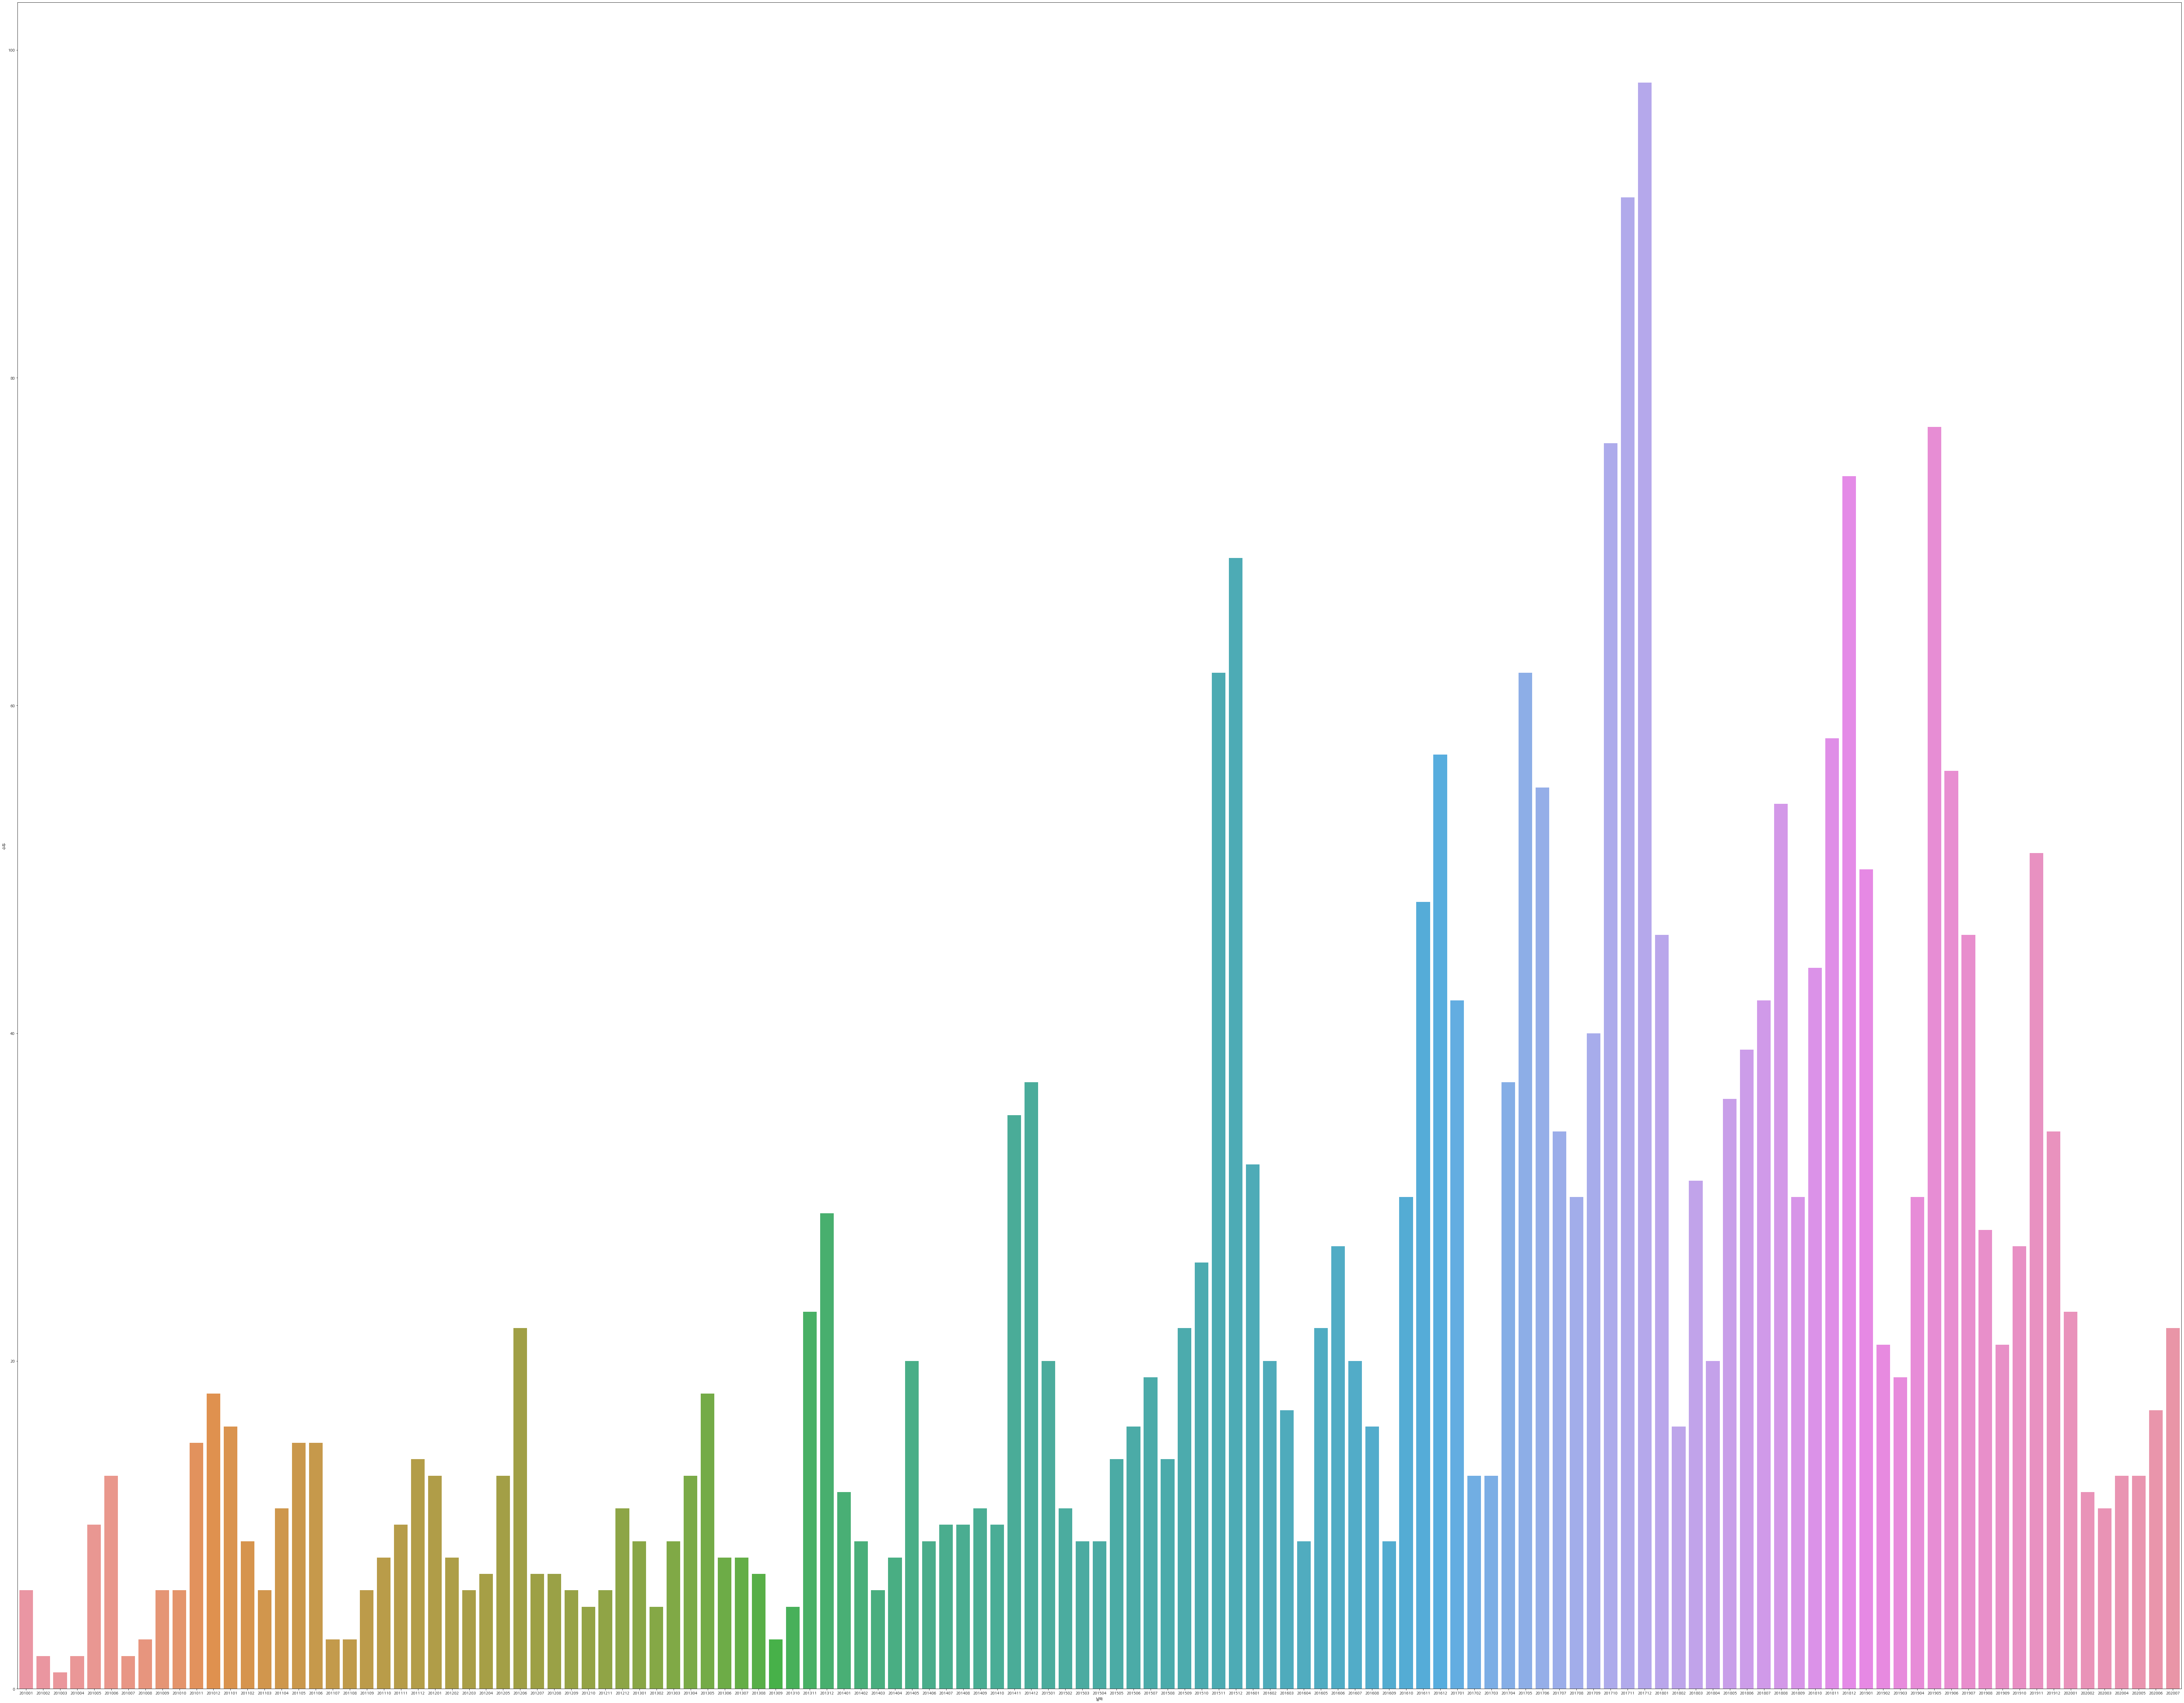

In [147]:
plt.figure(figsize=(100,80))
sns.barplot(gangnam['날짜'],gangnam['수두'])

In [116]:
df_whole.to_csv('whole.csv',index = 'Unnamed: 0')

In [117]:
pd.read_csv('whole.csv')

,Unnamed: 0,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,...,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증,날짜
0,0,전국,전국,0,0,0,0,0,0,0,...,9,5,0,0,0,0,0,0,0,201001
1,1,서울,서울,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,201001
2,2,서울,강남구,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,201001
3,3,서울,강동구,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,201001
4,4,서울,강북구,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36825,285,제주,제주시,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,202007
36826,286,제주,남제주군,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202007
36827,287,제주,북제주군,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202007
36828,288,세종,세종,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202007


In [135]:
whole = pd.read_csv('whole.csv', index_col = 'Unnamed: 0')

In [136]:
gangnam = whole[whole['구구분'] == '강남구 ']

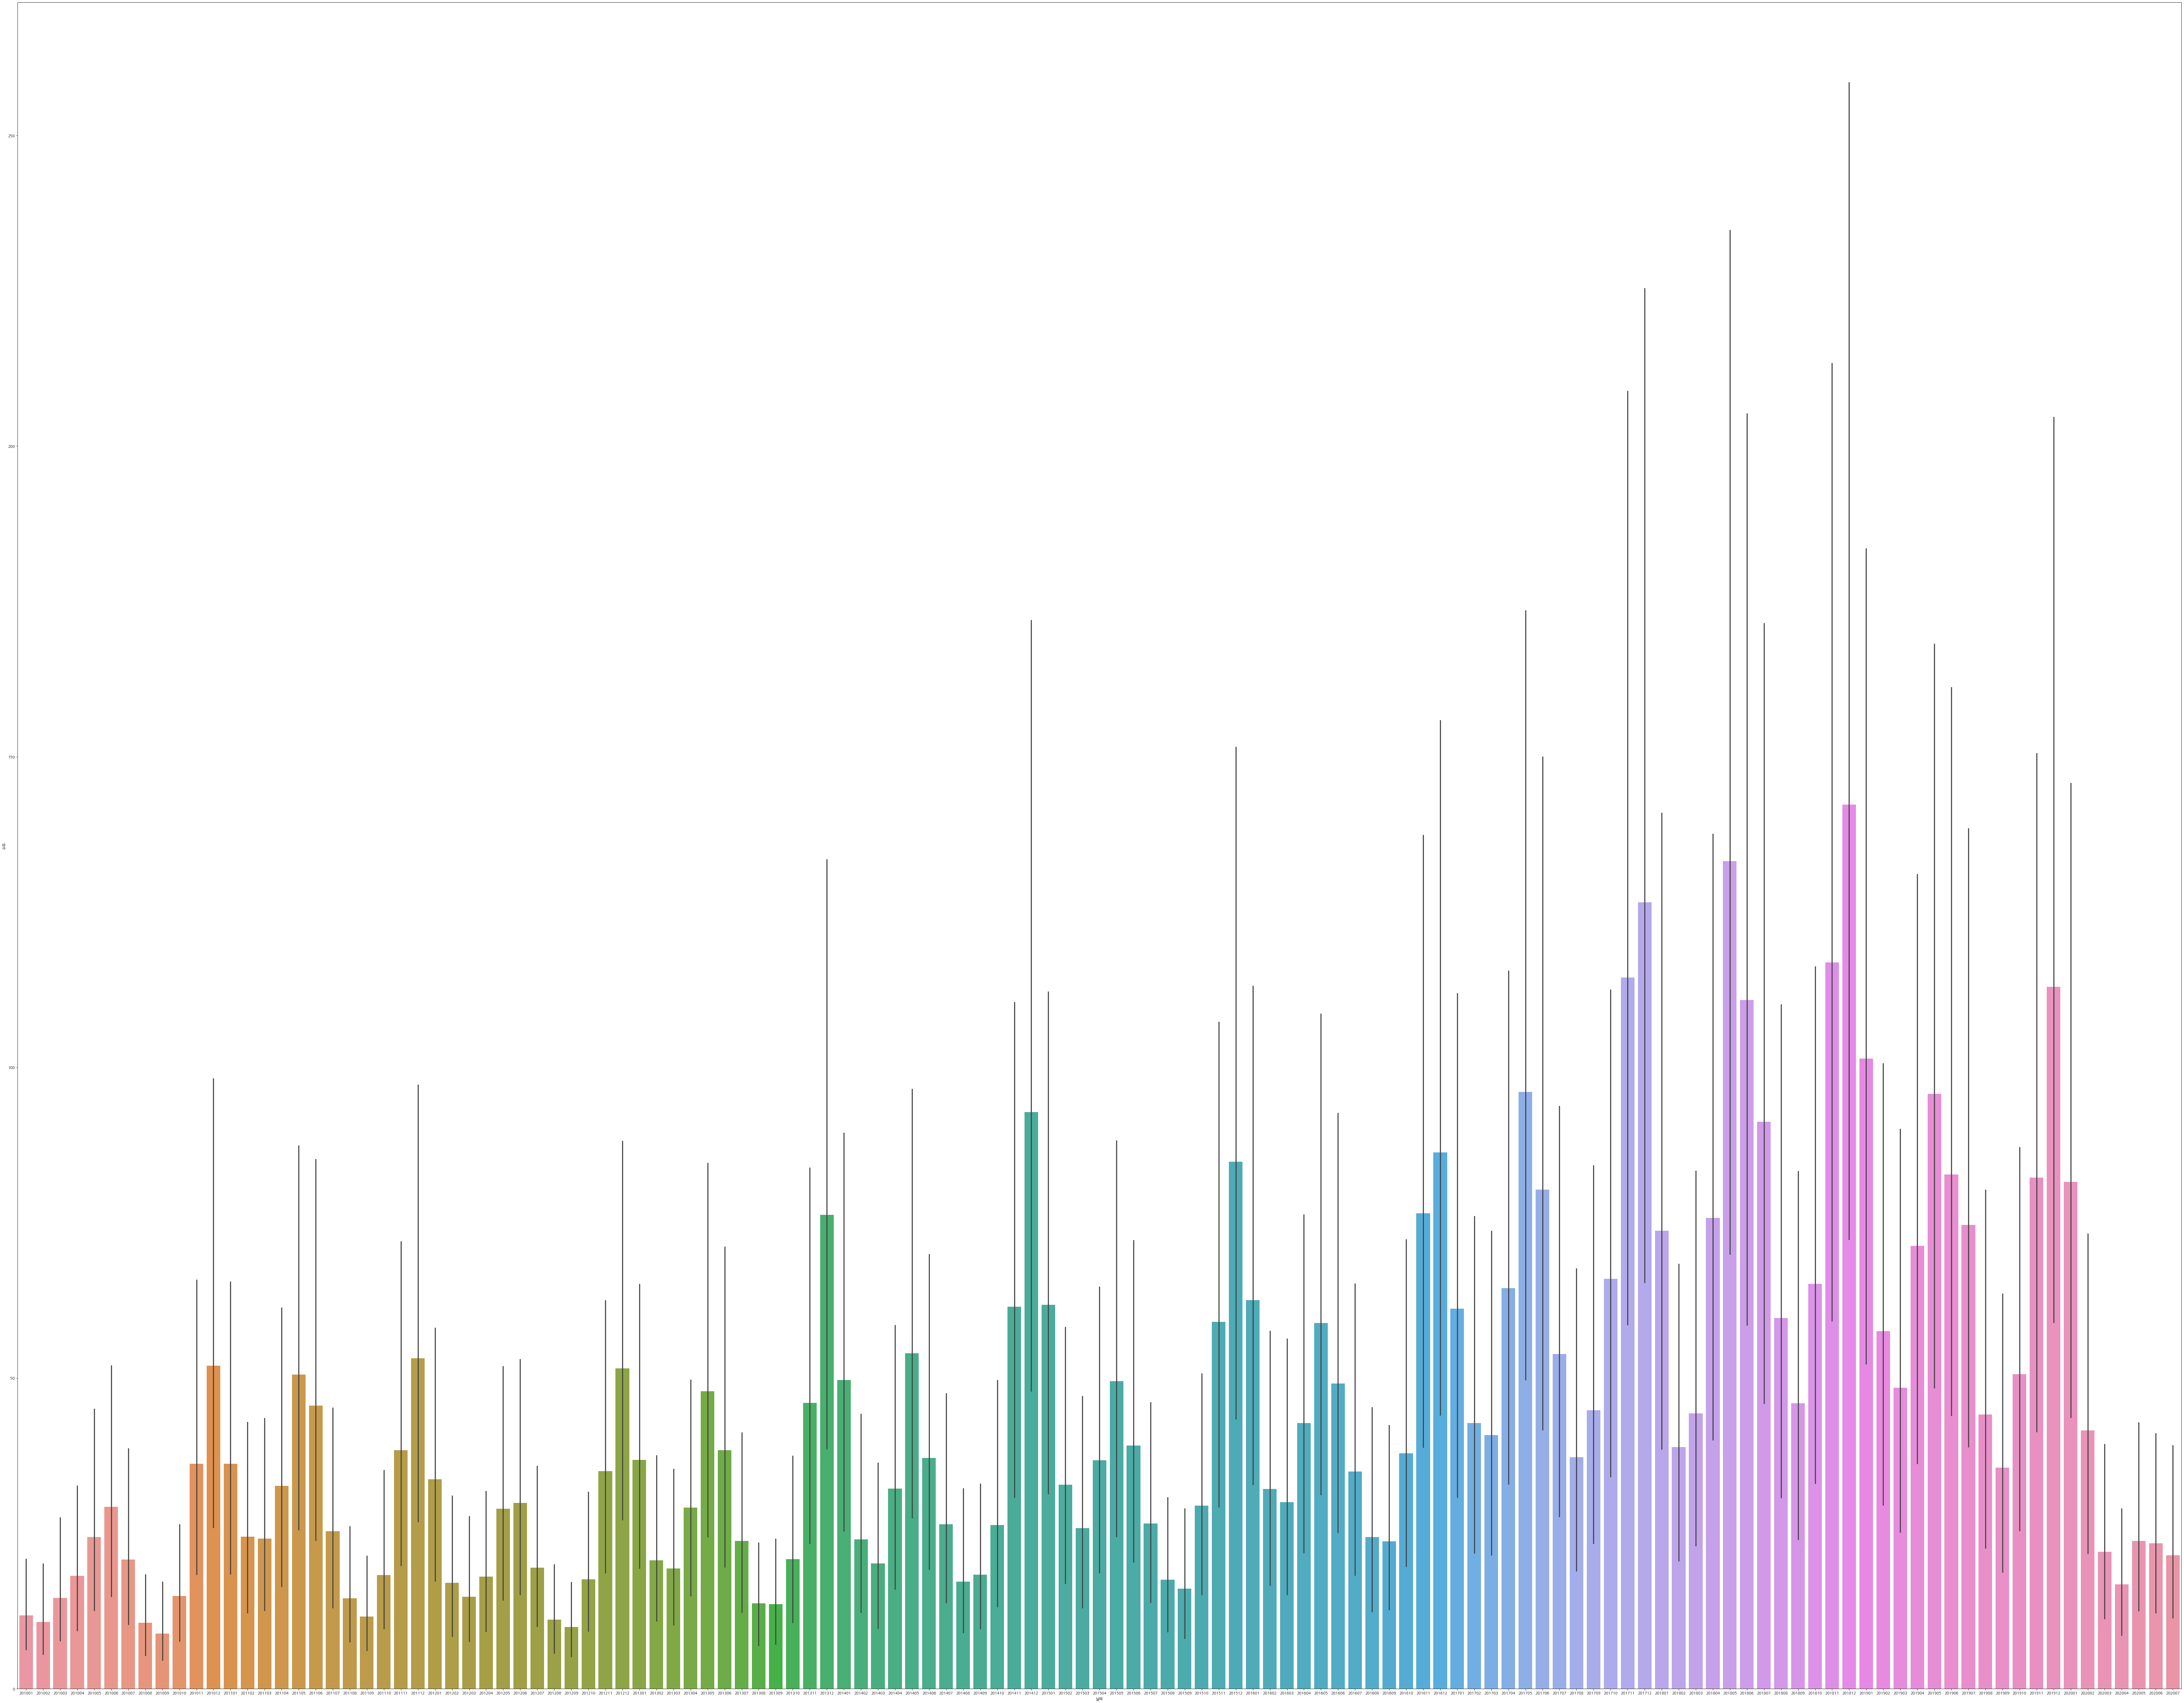

In [142]:
plt.figure(figsize=(100,80))
sns.barplot(whole['날짜'], whole['수두'])

In [148]:
df_whole

,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,...,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증,날짜
0,전국,전국,0,0,0,0,0,0,0,0,...,9,5,0,0,0,0,0,0,0,201001
1,서울,서울,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,201001
2,서울,강남구,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,201001
3,서울,강동구,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,201001
4,서울,강북구,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,제주,제주시,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,202007
286,제주,남제주군,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202007
287,제주,북제주군,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202007
288,세종,세종,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202007
